In [1]:
import numpy as np
from numpy.random import random
from numpy import pi

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

<br> Численный метод Монте-Карло подразумевает простейший перебор точек на площади. Расчет заключается в том, что мы берем квадрат со стороной a = 2r, вписываем в него круг радиусом r. И начинаем наугад ставить точки внутри квадрата
<br> Вероятность, что точка попадет в круг, равна отношению площадей круга и квадрата:
<br> $$P1 = S(круг)/S(квадрат) = pi*r^2/ (4*r^2) = pi/4$$
<br> Иначе $$P2 = N(попавших в круг)/N(точек)$$
<br> Следовательно при $N(точек)=>infinity$ $$pi/4 = N(попавших в круг)/N(точек)$$
<br> $$pi = 4 * N(попавших в круг)/N(точек)$$

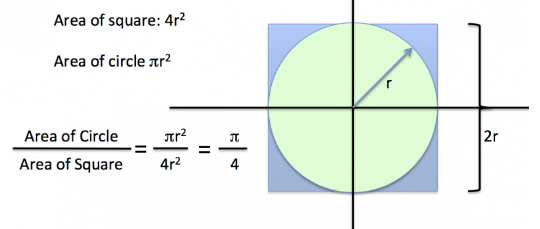

In [28]:
def MonteCarloPi(n):
    insideX, insideY, outsideX, outsideY, Iteration, CurrentPi = [], [], [], [], [], []
    inside = 0
    
    # Координаты точек стоорн квадрата со стороной a = 2r = 2
    squareX = [1, -1, -1, 1, 1]
    squareY = [1, 1, -1, -1, 1]
    
    # Координаты точек окружности
    circleX, circleY = [], []   
    for i in range(361):
        circleX.append(np.cos(np.pi * i / 180))
        circleY.append(np.sin(np.pi * i / 180))
    
    
    for i in range(n):
        # Генерация точек с координатами (x, y) - необходима нормировка относительно шкалы [-1; 1]
        # путем вычитания 0,5 и умножения на 2, поскольку np.random() возвращает значения [0.0, 1.0)
        x = 2 * (random() - 0.5)
        y = 2 * (random() - 0.5)
        # Находим расстояние до текущей точки
        r = np.sqrt(x**2 + y**2)
        Iteration.append(i)
        
        # Если расстояние меньше радиуса, значит точка в круге
        if r <= 1:
            inside += 1
            insideX.append(x)
            insideY.append(y)
        
        # Иначе - за кругом
        else:
            outsideX.append(x)
            outsideY.append(y)
        CurrentPi.append(4 * inside / (i + 1))
    
    # Рассчитываем значение pi и погрешность найденного значения
    piValue = 4 * inside / n
    piError = round(100 * ((piValue - pi) / pi), 4)
    
    # Рисуем квадрат, круг и полученные точки
    plt.figure(figsize=(5, 5))
    plt.plot(squareX, squareY, color='#000000')
    plt.plot(circleX, circleY, color='#0000CC')
    plt.scatter(insideX, insideY, color='#00CC00', marker=".")
    plt.scatter(outsideX, outsideY, color='#CC0000', marker=".")
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Рисуем график найденного значения pi от шага итерации
    plt.figure(figsize=(5, 5))
    plt.plot(Iteration, CurrentPi, color='#009900')
    plt.axhline(y=pi, color='#0F0F0F', ls='--')
    plt.axis([0, n, 2, 4.1])
    plt.xlabel('Iteration Number')
    plt.ylabel('Estimate for pi')
    
    print('\n' + f'Pi is approximately {piValue}\n')
    print(f'This is {piError}% off the true value.\n')


Pi is approximately 2.76

This is -12.1465% off the true value.



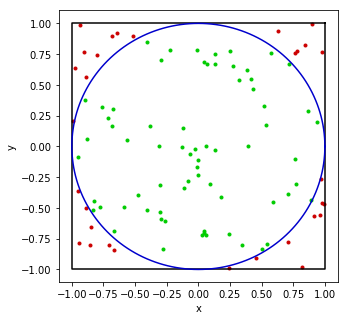

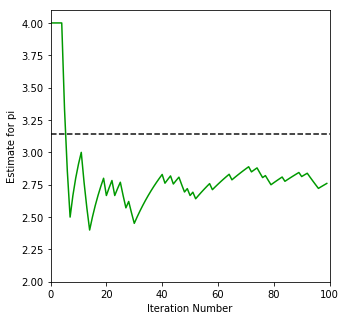

In [29]:
MonteCarloPi(100)


Pi is approximately 3.104

This is -1.1966% off the true value.



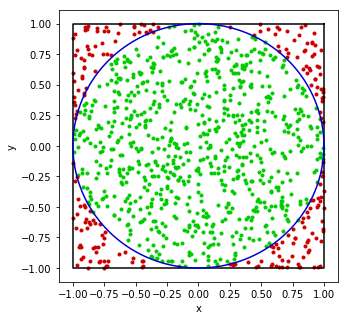

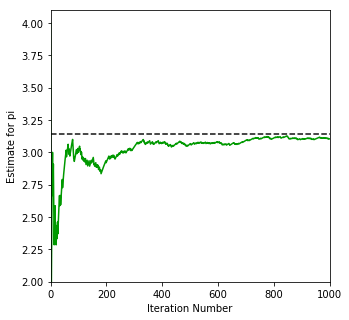

In [30]:
MonteCarloPi(1000)